In [1]:
import pandas as pd


In [2]:
%pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 8.9 MB/s  0:00:009.5 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.8 MB/s  0:00:007.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib] 5/6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('../data/processed/df_final_scored_with_descriptions.csv')

In [14]:
df.head()

,title,author,rating,rating_count,description,isbn,image,book_url,pages,published_year,...,score_on_the_go,score_on_the_go_broad,score_educational,score_educational_broad,score_adrenaline,score_adrenaline_broad,top_mood,top_mood_score,second_mood_score,top_mood_margin
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.35,9943135.0,Winning means fame and fortune. Losing means c...,9780439023481.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/2767052-th...,374.0,NaN,...,0.0,0.0,0.000000,0.00,0.633333,0.95,score_beach,1.000000,1.00,0.000000
1,Pride and Prejudice,Jane Austen,4.30,4821169.0,"Since its immediate success in 1813, Pride and...",9781441341709.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/1885.Pride...,279.0,NaN,...,0.0,0.0,0.750000,0.75,0.000000,0.00,score_bedtime,0.900000,0.75,0.150000
2,To Kill a Mockingbird,Harper Lee,4.26,6905680.0,"""Shoot all the bluejays you want, if you can h...",9780060935467.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/2657.To_Ki...,323.0,NaN,...,0.0,0.0,0.733333,1.10,0.000000,0.00,score_educational,0.733333,0.00,0.733333
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3805184.0,It's official: the evil Lord Voldemort has ret...,9780439358064.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/58613451-h...,896.0,NaN,...,0.0,0.0,0.000000,0.00,0.400000,0.40,score_beach,1.000000,1.00,0.000000
4,The Book Thief,Markus Zusak,4.39,2887607.0,Librarian's note: An alternate cover edition c...,NaN,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/19063.The_...,592.0,NaN,...,0.0,0.0,0.750000,0.75,0.000000,0.00,score_beach,1.000000,1.00,0.000000


In [15]:
df.columns


Index(['title', 'author', 'rating', 'rating_count', 'description', 'isbn',
       'image', 'book_url', 'pages', 'published_year', 'language', 'genres',
       'source', 'genres_list', 'tags_str', 'tag_count', 'tag_1', 'tag_2',
       'tag_3', 'tag_4', 'tag_5', 'tags_imputed_from_author', 'tag_set',
       'score_bedtime', 'score_bedtime_broad', 'score_beach',
       'score_beach_broad', 'score_easy', 'score_easy_broad',
       'score_on_the_go', 'score_on_the_go_broad', 'score_educational',
       'score_educational_broad', 'score_adrenaline', 'score_adrenaline_broad',
       'top_mood', 'top_mood_score', 'second_mood_score', 'top_mood_margin'],
      dtype='object')

# Rating analysis

**Rating vs Mood score**

In [16]:
mood_cols = [
    "score_easy",
    "score_beach",
    "score_adrenaline",
    "score_educational",
    "score_bedtime",
]


In [17]:
# sanity check --> numeric 

df[mood_cols + ["rating", "rating_count"]].dtypes


score_easy           float64
score_beach          float64
score_adrenaline     float64
score_educational    float64
score_bedtime        float64
rating               float64
rating_count         float64
dtype: object

In [18]:
df_mood = df.dropna(subset=["rating"] + mood_cols).copy()

In [19]:
df_mood = df_mood[df_mood["rating_count"] >= 50]

In [20]:
corr_pearson = (
    df_mood[mood_cols + ["rating"]]
    .corr(method="pearson")["rating"]
    .drop("rating")
    .sort_values(ascending=False)
)

corr_pearson


score_bedtime        0.140189
score_beach          0.118552
score_easy           0.046287
score_adrenaline     0.023850
score_educational   -0.030272
Name: rating, dtype: float64

- score_bedtime 0.14 --> Calm, cozy books get higher ratings
- score_beach also positive relationship with ratings 
- score_adrenaline low correlation  --> Likely polarizing


In [21]:
# plot 



c = "score_bedtime" # change with the mood score 

tmp = df[[c, "rating"]].dropna().copy()
tmp["bin"] = pd.qcut(tmp[c], 10, duplicates="drop")  # 10 equal-sized bins


In [22]:
mean_rating = tmp.groupby("bin")["rating"].mean()


/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_65161/2392037537.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating = tmp.groupby("bin")["rating"].mean()


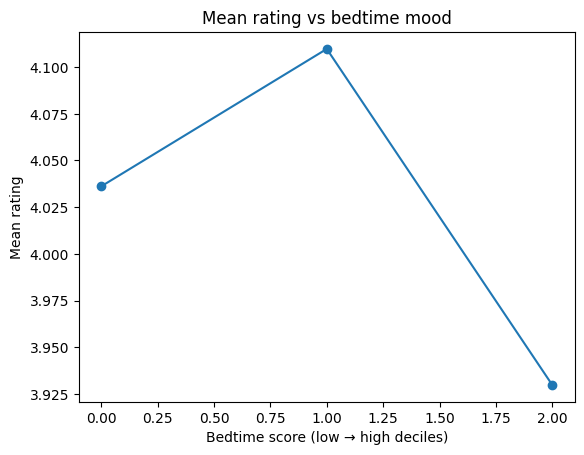

In [23]:
plt.figure()
plt.plot(range(len(mean_rating)), mean_rating.values, marker="o")
plt.xlabel("Bedtime score (low → high deciles)")
plt.ylabel("Mean rating")
plt.title("Mean rating vs bedtime mood")
plt.show()


/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_65161/3294085414.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = tmp.groupby("bin")["rating"].mean()


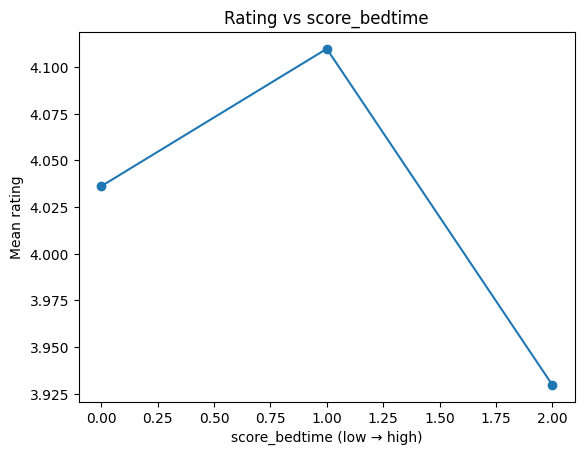

/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_65161/3294085414.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = tmp.groupby("bin")["rating"].mean()


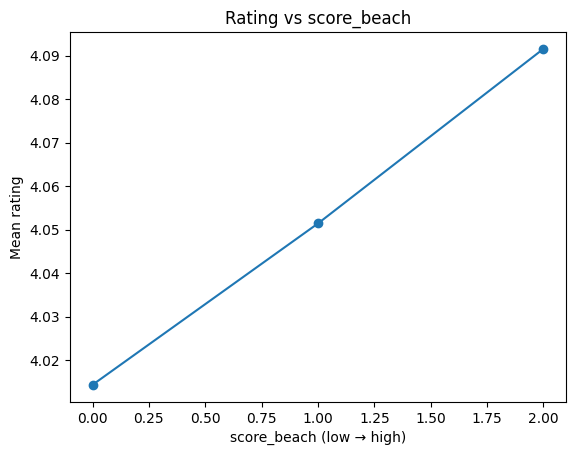

/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_65161/3294085414.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = tmp.groupby("bin")["rating"].mean()


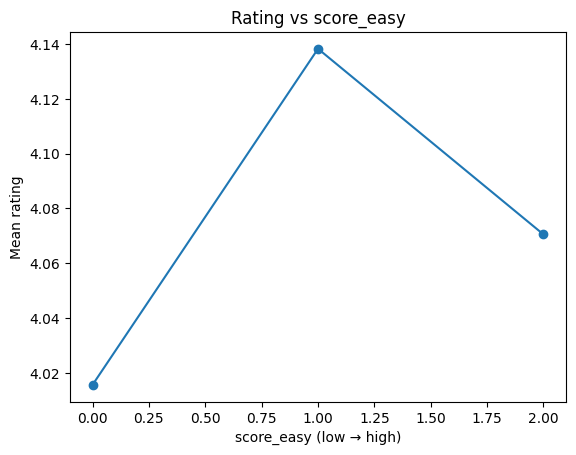

/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_65161/3294085414.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = tmp.groupby("bin")["rating"].mean()


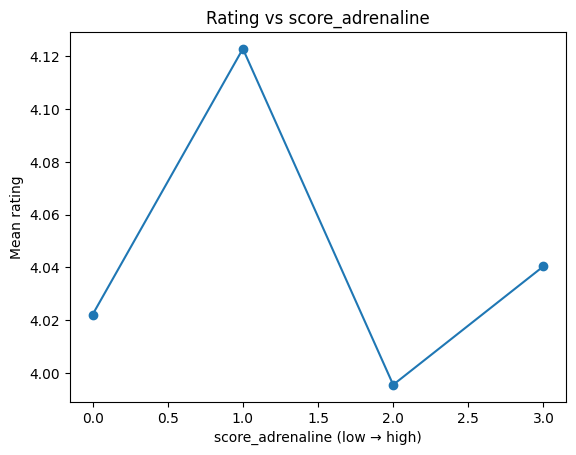

/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_65161/3294085414.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = tmp.groupby("bin")["rating"].mean()


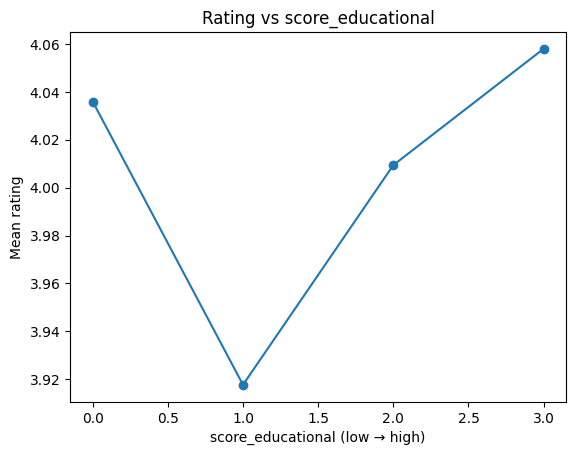

In [24]:
# visualize all mood 

mood_cols = [
    "score_bedtime",
    "score_beach",
    "score_easy",
    "score_adrenaline",
    "score_educational"
]

for c in mood_cols:
    tmp = df[[c, "rating"]].dropna().copy()
    tmp["bin"] = pd.qcut(tmp[c], 10, duplicates="drop")
    means = tmp.groupby("bin")["rating"].mean()

    plt.figure()
    plt.plot(range(len(means)), means.values, marker="o")
    plt.xlabel(f"{c} (low → high)")
    plt.ylabel("Mean rating")
    plt.title(f"Rating vs {c}")
    plt.show()


- bedtime score: Medium bedtime → highest (~4.11) --> Moderate bedtime mood performs best
- adrenaline score: highly polarized --> 
- Low adrenaline → ~4.02 - med engagemnt 
- Medium adrenaline → highest (~4.12) - high engagement
- High adrenaline → lowest (~4.00) - small niche 